In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/braille-character-dataset/Dataset Description.txt
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/e1.JPG18rot.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/u1.JPG15whs.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/j1.JPG0rot.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/d1.JPG18whs.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/y1.JPG18dim.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/j1.JPG6whs.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/x1.JPG10whs.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/r1.JPG17rot.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/p1.JPG11whs.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Braille Dataset/z1.JPG17rot.jpg
/kaggle/input/braille-character-dataset/Braille Dataset/Br

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2


In [3]:
image_dir = Path('../input/braille-character-dataset/Braille Dataset/Braille Dataset')

In [4]:
dir_list = list(image_dir.glob('*.jpg'))

In [5]:
image_count = len(dir_list)
image_count

1560

In [6]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [7]:
#opens images and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [8]:
#turn both lists in numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T #transpose - convert columns to rows

In [9]:
#encodes name_list and normalizes image_list
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 
print(images_list[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.97647059 0.97647059 0.97647059]
  [0.98431373 0.98431373 0.98431373]
  [0.99607843 0.99607843 0.99607843]]

 [[0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  [0.99607843 0.99607843 0.99607843]]

 [[0.97254902 0.97254902 0.97254902]
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98039216 0.98039216 0.98039216]
  [0.97647059 0.97647059 0.97647059]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


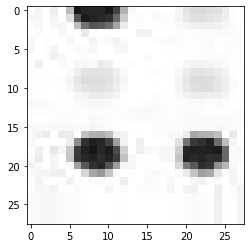

In [10]:
plt.imshow(images_list[1])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

Creating model: Trial 1: Adam Optimizer

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride.It is called SAME because, for stride 1 , the output will be the same as the input.

In [14]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

if you use categorical-cross-entropy you need one-hot encoding, and if you use sparse-categorical-cross-entropy you encode as normal integers.

In [15]:
from keras.callbacks import EarlyStopping

In [16]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

2022-01-10 15:14:12.038325: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
28/28 [==============================] - 3s 53ms/step - loss: 3.2136 - sparse_categorical_accuracy: 0.1111 - val_loss: 3.2806 - val_sparse_categorical_accuracy: 0.0347
Epoch 2/100
28/28 [==============================] - 1s 41ms/step - loss: 1.9712 - sparse_categorical_accuracy: 0.4055 - val_loss: 4.0464 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 1s 42ms/step - loss: 1.4477 - sparse_categorical_accuracy: 0.5762 - val_loss: 6.1734 - val_sparse_categorical_accuracy: 0.0347
Epoch 4/100
28/28 [==============================] - 1s 42ms/step - loss: 1.0996 - sparse_categorical_accuracy: 0.6816 - val_loss: 7.4937 - val_sparse_categorical_accuracy: 0.0347
Epoch 5/100
28/28 [==============================] - 1s 41ms/step - loss: 0.9113 - sparse_categorical_accuracy: 0.7377 - val_loss: 8.0086 - val_sparse_categorical_accuracy: 0.0347
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.7192 - sparse_categorica

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [18]:
time = np.arange(1, len(history.history['loss'])+1)

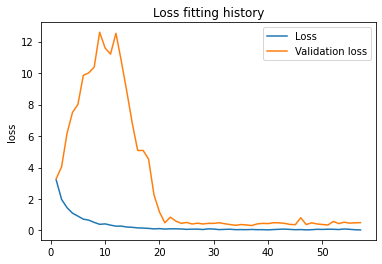

In [19]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

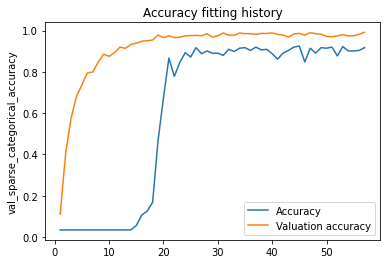

In [20]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [21]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)

Adam Optimizer
10/10 [==============================] - 0s 12ms/step - loss: 0.3104 - sparse_categorical_accuracy: 0.9199


[0.31035351753234863, 0.9198718070983887]

Creating model: Trial 2: RMS Prop

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [23]:
model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [24]:
from keras.callbacks import EarlyStopping

In [25]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 53ms/step - loss: 3.0786 - sparse_categorical_accuracy: 0.1455 - val_loss: 3.2806 - val_sparse_categorical_accuracy: 0.0427
Epoch 2/100
28/28 [==============================] - 1s 43ms/step - loss: 1.8787 - sparse_categorical_accuracy: 0.4834 - val_loss: 4.3450 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 1s 44ms/step - loss: 1.3568 - sparse_categorical_accuracy: 0.6151 - val_loss: 5.6670 - val_sparse_categorical_accuracy: 0.0347
Epoch 4/100
28/28 [==============================] - 1s 43ms/step - loss: 1.0273 - sparse_categorical_accuracy: 0.7033 - val_loss: 6.6812 - val_sparse_categorical_accuracy: 0.0347
Epoch 5/100
28/28 [==============================] - 1s 42ms/step - loss: 0.8390 - sparse_categorical_accuracy: 0.7480 - val_loss: 7.0417 - val_sparse_categorical_accuracy: 0.0400
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.7031 - sparse_categorica

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)         

In [27]:
time = np.arange(1, len(history.history['loss'])+1)

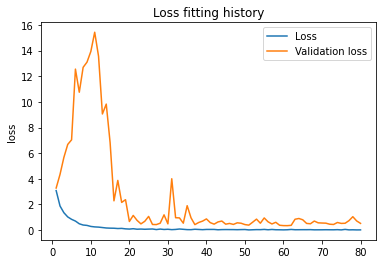

In [28]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

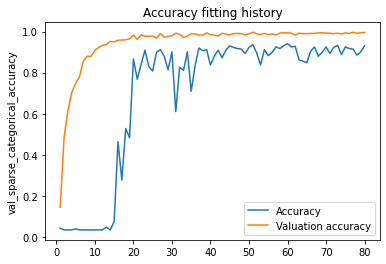

In [29]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [30]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 [==============================] - 0s 11ms/step - loss: 0.2972 - sparse_categorical_accuracy: 0.9519


[0.29716232419013977, 0.9519230723381042]